# Practical 1
## MATRIX MULTIPLICATION, EIGEN VECTORS, EIGENVALUE COMPUTATION USING TENSORFLOW

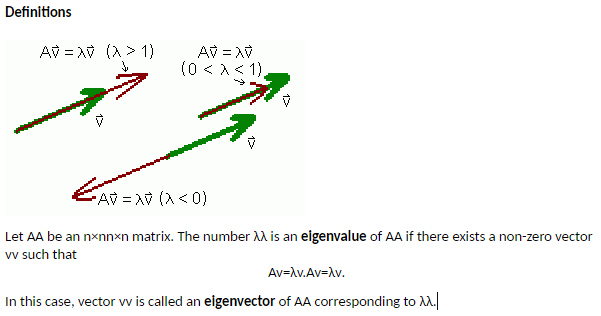

In [ ]:
import tensorflow as tf
print("Matrix Multiplication Demo")

Matrix Multiplication Demo


In [ ]:
x=tf.constant([1,2,3,4,5,6],shape=[2,3])
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [ ]:
y=tf.constant([7,8,9,10,11,12],shape=[3,2])
print(y)

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)


In [ ]:
z=tf.matmul(x,y)

In [ ]:
print("Product:",z)

Product: tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)


In [ ]:
e_matrix_A=tf.random.uniform([2,2],minval=3,maxval=10,dtype=tf.float32,name="matrixA")
print("Matrix A:\n{}\n\n".format(e_matrix_A))

Matrix A:
[[8.7307205 9.0639515]
 [5.393942  9.614674 ]]




In [ ]:
eigen_values_A,eigen_vectors_A=tf.linalg.eigh(e_matrix_A)
print("Eigen Vectors:\n{}\n\nEigen values:\n{}\n".format(eigen_vectors_A, eigen_values_A))

Eigen Vectors:
[[-0.73541343 -0.6776187 ]
 [ 0.6776187  -0.73541343]]

Eigen values:
[ 3.760678 14.584717]



# Practical 2
## Deep Forward Network For XOR

Deep feedforward networks, also often called feedforward neural networks, or multilayer perceptron’s (MLPs), are the quintessential deep learning models. The goal of a feedforward network is to approximate some function f*.<br>
For example, for a classiﬁer, y = f*(x) maps an input x to a category y. A feedforward network deﬁnes a mapping y = f (x; θ) and learns the value of the parameters θ that result in the best function approximation.<br>
These models are called feedforward because information ﬂows through the function being evaluated from x, through the intermediate computations used to deﬁne f, and ﬁnally to the output y. There are no feedback connections in which outputs of the model are fed back into itself.<br>
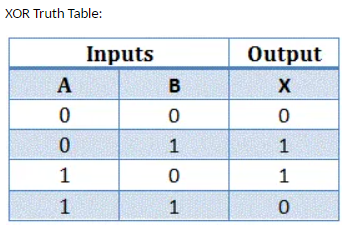

In [ ]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Dense(units=2,activation='relu',input_dim=2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(model.get_weights())

[array([[-0.8435025 , -0.37239122],
       [ 0.34912777, -1.1265315 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.24817407],
       [-1.3532746 ]], dtype=float32), array([0.], dtype=float32)]


In [ ]:
X=np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
Y=np.array([0.,1.,1.,0.])

model.fit(X,Y,epochs=1000,batch_size=4)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7042 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7041 - accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7040 - accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7039 - accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7036 - accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7034 - accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7033 - accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7032 - accuracy: 0.2500
Epoch 11/1000
1/1 

In [ ]:
print(model.get_weights())

[array([[-0.8435025 , -0.37239122],
       [ 0.16758746, -1.1265315 ]], dtype=float32), array([-0.18154037,  0.        ], dtype=float32), array([[-0.11407749],
       [-1.3532746 ]], dtype=float32), array([2.1596843e-08], dtype=float32)]


In [ ]:
print(model.predict(X,batch_size=4))

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


# PRACTICAL 3A
## CLASSIFICATION USING DNN

Classification neural networks used for feature categorization are very similar to fault-diagnosis networks, except that they only allow one output response for any input pattern, instead of allowing multiple faults to occur for a given set of operating conditions.
The classification network selects the category based on which output response has the highest output value.<br>
<br>
Problem statement:<br> 
The given dataset comprises health information about diabetic women patients. We need to create a deep feed forward network that will classify women suffering from diabetes mellitus as 1.

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset=loadtxt('/content/sample_data/diabetes.csv',delimiter=',', skiprows=1)
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:
X=dataset[:,0:8]
Y=dataset[:,8]
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(Y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [ ]:
#Creating model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling and fitting model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=150, batch_size=10)
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 4.2733 - accuracy: 0.5039
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.3494 - accuracy: 0.5703
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1380 - accuracy: 0.5703
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0105 - accuracy: 0.5872
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.5964
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9140 - accuracy: 0.6094
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8947 - accuracy: 0.6367
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.6419
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8177 - accuracy: 0.6406
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7770 - accuracy: 0.6549
Epoch 11/

In [ ]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.7826

accuracy: 78.26%


# PRACTICAL 3B
## BINARY CLASSIFICATION USING MLP

Multilayer Perceptron falls under the category of feedforward algorithms, because inputs are combined with the initial weights in a weighted sum and subjected to the activation function, just like in the Perceptron. But the difference is that each linear combination is propagated to the next layer.
Each layer is feeding the next one with the result of their computation, their internal representation of the data. This goes all the way through the hidden layers to the output layer.
<br>
Binary classification, which looks at an input and predicts which of two possible classes it belongs to. Practical uses include sentiment analysis, spam detection, and credit-card fraud detection. Such models are trained with datasets labelled with 1s and 0s representing the two classes, employ popular learning algorithms such as logistic regression and Naïve Bayes, and are frequently built with libraries such as Scikit-learn.

In [ ]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# load the dataset
path = '/content/sample_data/Ionosphere.csv'
df = read_csv(path, header=None, skiprows=1)

In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

(235, 34) (116, 34) (235,) (116,)


In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.966


In [ ]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.985


# X PRACTICAL 3C
## CONVOLUTIONAL NEURAL NETWORK

# PRACTICAL 4
## PREDICTING THE PROBABILITY OF THE CLASS

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X,Y=make_blobs(n_samples=100,centers=2,n_features=2,random_state=1)
scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)

In [ ]:
model=Sequential()
model.add(Dense(4,input_dim=2,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X,Y,epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7692
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7651
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7616
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7577
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7544
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7509
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7478
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7450
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7417
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7388
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7358
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7326
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

In [ ]:
Xnew,Yreal=make_blobs(n_samples=3,centers=2,n_features=2,random_state=1)
Xnew=scalar.transform(Xnew)
Yclass=model.predict(Xnew)
Ynew=model.predict(Xnew)

In [ ]:
for i in range(len(Xnew)):
  print("X=%s,Predicted_probability=%s,Predicted_class=%s"%(Xnew[i],Ynew[i],Yclass[i]))

X=[0.89337759 0.65864154],Predicted_probability=[0.00376934],Predicted_class=[0.00376934]
X=[0.29097707 0.12978982],Predicted_probability=[0.81591594],Predicted_class=[0.81591594]
X=[0.78082614 0.75391697],Predicted_probability=[0.00787392],Predicted_class=[0.00787392]


# PRACTICAL 5A
## CNN FOR CIFAR10 IMAGES

A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:
- convolutional layers
- pooling layers
- dense layers
<br>
Convolutional neural networks have had great success in certain kinds of problems, such as image recognition.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 7s 0us/step


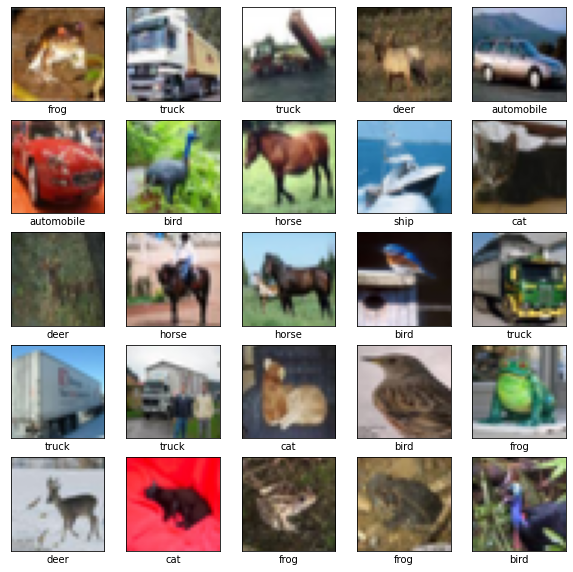

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5349 - accuracy: 0.8113 - val_loss: 0.8688 - val_accuracy: 0.7212
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4958 - accuracy: 0.8240 - val_loss: 0.9234 - val_accuracy: 0.7127
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.4615 - accuracy: 0.8355 - val_loss: 0.9227 - val_accuracy: 0.7194
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.4303 - accuracy: 0.8475 - val_loss: 0.9697 - val_accuracy: 0.7121
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4006 - accuracy: 0.8571 - val_loss: 1.0437 - val_accuracy: 0.7037
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.3716 - accuracy: 0.8672 - val_loss: 1.0158 - val_accuracy: 0.7122
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.3449 - accuracy: 0.8784 - val_loss: 1.0961 -

313/313 - 2s - loss: 1.2522 - accuracy: 0.7043 - 2s/epoch - 7ms/step


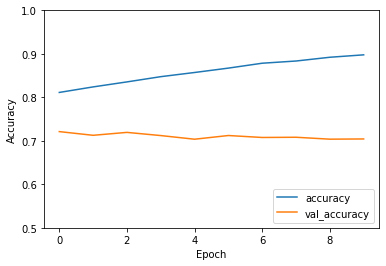

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7042999863624573


# PRACTICAL 5B
## IMAGE CLASSIFICATION

We will classify images of flowers. It creates an image classifier using a tf.keras.Sequential model, and loads data using tf.keras.utils.image_dataset_from_directory. You will gain practical experience with the following concepts:
1. Efficiently loading a dataset off disk.
2. Identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout.
3. Examine and understand data
4. Build an input pipeline
5. Build the model
6. Train the model
7. Test the model
8. Improve the model and repeat the process

This dataset is of about 3,700 photos of flowers. The dataset contains five sub-directories, one per class:
- flower_photo
  1. daisy
  2. dandelion
  3. roses
  4. sunflowers
  5. tulips

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


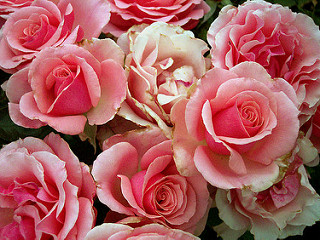

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

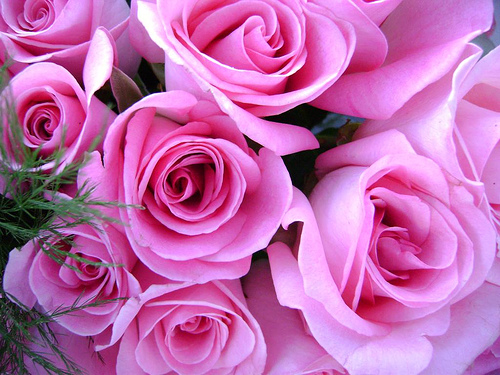

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

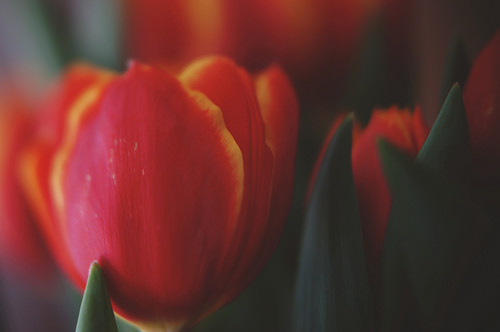

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


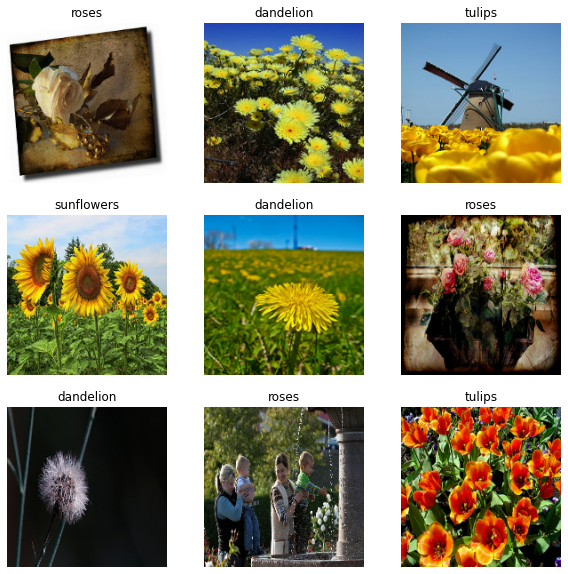

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 58s 626ms/step - loss: 1.3771 - accuracy: 0.4022 - val_loss: 1.1025 - val_accuracy: 0.5204
Epoch 2/10
92/92 [==============================] - 56s 611ms/step - loss: 1.0390 - accuracy: 0.5817 - val_loss: 0.9787 - val_accuracy: 0.6104
Epoch 3/10
92/92 [==============================] - 56s 611ms/step - loss: 0.8589 - accuracy: 0.6717 - val_loss: 0.8943 - val_accuracy: 0.6512
Epoch 4/10
92/92 [==============================] - 57s 622ms/step - loss: 0.6707 - accuracy: 0.7466 - val_loss: 0.8915 - val_accuracy: 0.6689
Epoch 5/10
92/92 [==============================] - 56s 614ms/step - loss: 0.4730 - accuracy: 0.8317 - val_loss: 1.0263 - val_accuracy: 0.6431
Epoch 6/10
92/92 [==============================] - 57s 623ms/step - loss: 0.3004 - accuracy: 0.8934 - val_loss: 1.1866 - val_accuracy: 0.6444
Epoch 7/10
92/92 [==============================] - 57s 619ms/step - loss: 0.1637 - accuracy: 0.9506 - val_loss: 1.2467 - val_accuracy: 0.6526

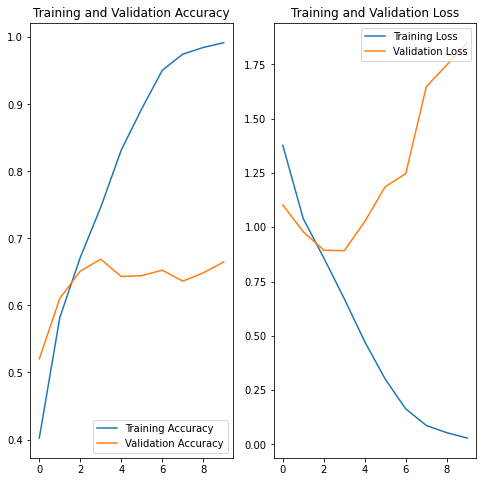

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

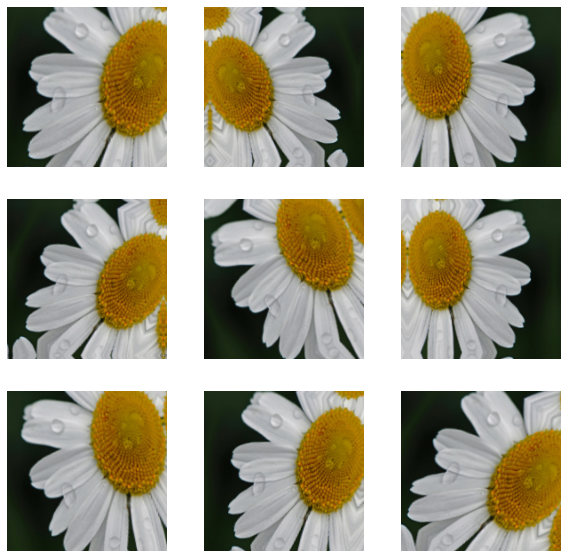

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 67s 720ms/step - loss: 1.2278 - accuracy: 0.4871 - val_loss: 1.1331 - val_accuracy: 0.5545
Epoch 2/15
92/92 [==============================] - 65s 709ms/step - loss: 0.9825 - accuracy: 0.6185 - val_loss: 0.9444 - val_accuracy: 0.6308
Epoch 3/15
92/92 [==============================] - 66s 719ms/step - loss: 0.9155 - accuracy: 0.6461 - val_loss: 0.9042 - val_accuracy: 0.6471
Epoch 4/15
92/92 [==============================] - 65s 709ms/step - loss: 0.8424 - accuracy: 0.6778 - val_loss: 0.8845 - val_accuracy: 0.6390
Epoch 5/15
92/92 [==============================] - 66s 716ms/step - loss: 0.7853 - accuracy: 0.6921 - val_loss: 0.7714 - val_accuracy: 0.6853
Epoch 6/15
92/92 [==============================] - 65s 708ms/step - loss: 0.7396 - accuracy: 0.7228 - val_loss: 0.7485 - val_accuracy: 0.7071
Epoch 7/15
92/92 [==============================] - 65s 709ms/step - loss: 0.7068 - accuracy: 0.7268 - val_loss: 0.7256 - val_accuracy: 0.6921

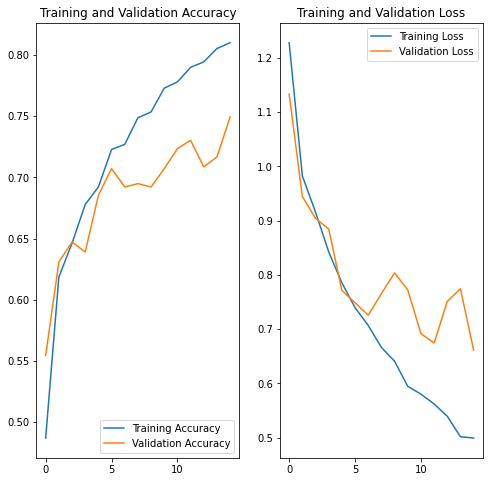

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

131072/117948 [=================================] - 0s 0us/step


In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 96.21 percent confidence.


# PRACTICAL 5C
## DATA AUGMENTATION

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras import layers
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


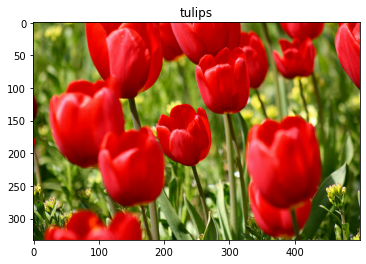

In [ ]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

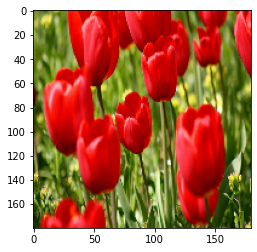

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


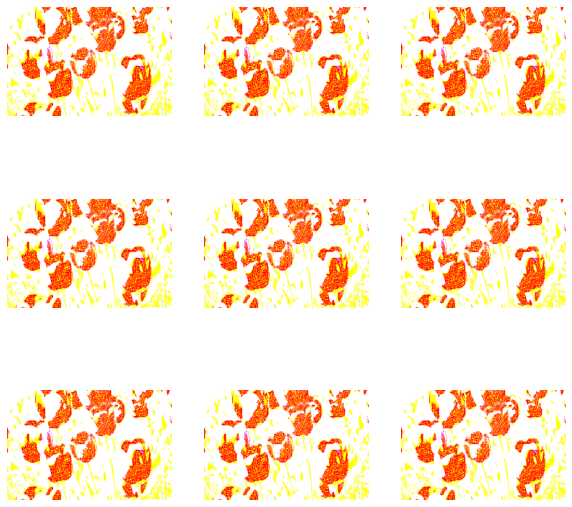

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
# Add the image to a batch.
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)
    
  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 65s 680ms/step - loss: 1.4067 - accuracy: 0.3971 - val_loss: 1.2178 - val_accuracy: 0.5123
Epoch 2/5
92/92 [==============================] - 61s 652ms/step - loss: 1.1268 - accuracy: 0.5364 - val_loss: 1.1275 - val_accuracy: 0.5286
Epoch 3/5
92/92 [==============================] - 62s 663ms/step - loss: 1.0204 - accuracy: 0.5950 - val_loss: 0.9355 - val_accuracy: 0.6458
Epoch 4/5
92/92 [==============================] - 61s 652ms/step - loss: 0.9607 - accuracy: 0.6213 - val_loss: 0.9732 - val_accuracy: 0.6349
Epoch 5/5
92/92 [==============================] - 61s 659ms/step - loss: 0.8926 - accuracy: 0.6543 - val_loss: 0.9574 - val_accuracy: 0.6185


In [ ]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 3s 199ms/step - loss: 0.8842 - accuracy: 0.6512
Accuracy 0.6512261629104614


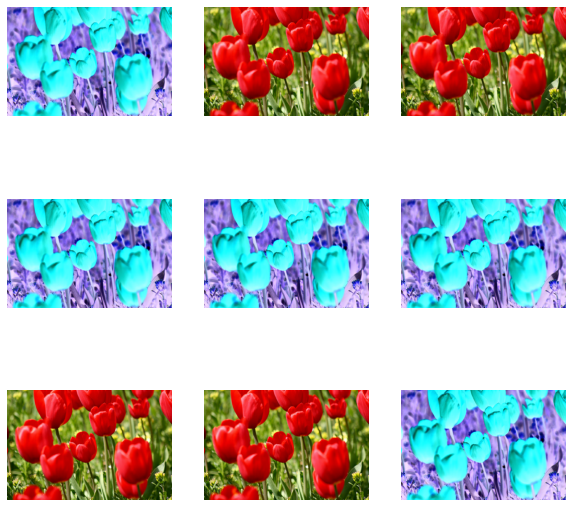

In [ ]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

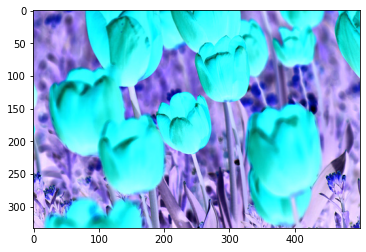

In [ ]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)
_ = plt.imshow(RandomInvert()(image)[0])

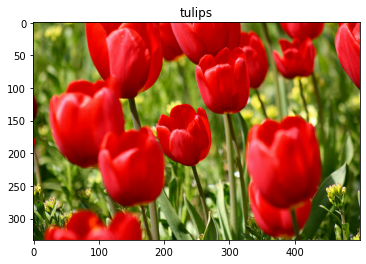

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

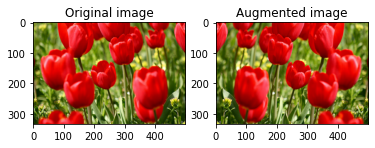

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

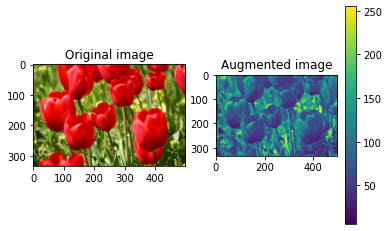

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

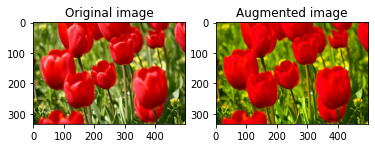

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

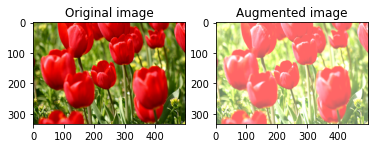

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

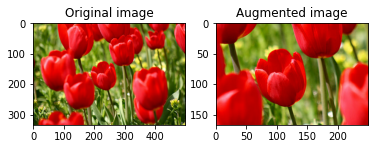

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

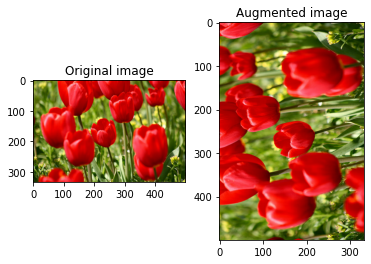

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

# PRACTICAL 6
## BUILDING RNN USING SINGLE NEURON

Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.
Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.
The Keras RNN API is designed with a focus on: <br>
**Ease of use:** the built-in keras.layers.RNN, keras. layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))
# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))
# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

In [ ]:
# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)

In [ ]:
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

In [ ]:
# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

In [ ]:
model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     64000       ['input_1[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 64)     128000      ['input_2[0][0]']                
                                                                                              

# ? PRACTICAL 7
## NLP CORPUS


```
part 1
https://colab.research.google.com/drive/13eUXd7QYS6ApMcL2yT0BG45J3tbFznlQ?usp=sharing

? part 2
https://colab.research.google.com/drive/1PV0knHi_dmwRUOKu58GSiI56fqRb9StI?usp=sharing
```

# ? PRACTICAL 8
## Lemmatization, stemming, token, stopwords



```
https://colab.research.google.com/drive/1y9yIwn6X8ZyN52y8tA6M2v8mDeoDFwOz?usp=sharing
```



# X PRACTICAL 9
## NLP

# PRACTICAL 10
## Word Embedding

In [ ]:
from gensim.models import Word2Vec

import numpy as np

In [ ]:
sentences = [['drink','not','good'],
			['felt','superb'],
			['just','good','ambience'],
			['bad','taste'],
			['parking','problem'],
            ['fantastic','food']]
y = np.array([0,1,1,0,0,1])

In [ ]:
model = Word2Vec(sentences, min_count=1,size=100)

In [ ]:
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [ ]:
words = list(model.wv.vocab)
print(words)

['drink', 'not', 'good', 'felt', 'superb', 'just', 'ambience', 'bad', 'taste', 'parking', 'problem', 'fantastic', 'food']


In [ ]:
print(model['drink'])
print(model['fantastic'])

[-5.0050818e-04  2.4672786e-03 -7.9926918e-04 -4.3498487e-03
  8.9418690e-04 -2.7653528e-03  4.7444564e-04 -4.3859198e-03
 -1.1973906e-03  8.7700860e-04 -4.3210834e-03  4.5646173e-03
 -1.4640016e-03 -3.8874540e-03 -2.3239923e-03 -8.3687960e-04
  2.6024114e-03  1.8356381e-03  4.4276826e-03  3.3546719e-03
  1.5427787e-03 -2.9658033e-03  4.3613068e-03 -4.5249020e-03
  1.1769844e-04  2.3500354e-03  4.9169124e-03  4.6623610e-03
 -5.9600483e-04  4.2867553e-03  2.8040679e-03 -9.5843535e-04
  6.5640768e-04  4.4129933e-03 -2.8350889e-03 -1.7969299e-03
 -3.6473530e-03  3.1940362e-03  2.1483670e-03 -3.4526661e-03
  2.7186791e-03  3.9265989e-03 -2.0560392e-03 -6.0720218e-04
 -2.4248050e-03 -1.0135595e-03  8.0119917e-04  6.5606751e-04
 -5.9487724e-05  4.3260008e-03  3.3480325e-03 -4.9368972e-03
 -3.7443740e-03 -3.6723157e-03  4.3429574e-03  2.3899982e-03
 -6.5888424e-04  2.1906642e-03 -1.4874450e-03 -4.7439621e-03
  2.5053741e-04  4.5042736e-03 -4.3766606e-03 -2.0952218e-03
 -2.9876768e-03  3.99864

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
means_0 = np.mean(model[sentences[0]],axis=0)
means = []
for i in sentences :
    row_means = np.mean(model[i],axis=0)
    means.append(row_means)
means = np.array(means) 
X = means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=100,oob_score=True)
model_rf.fit( X , y )
test_sentences = [['bad','food'],['just','fantastic']]
test_means = []
for i in test_sentences :
    row_means = np.mean(model[i],axis=0)
    test_means.append(row_means)
num_test_means = np.array(test_means) 
X_test = num_test_means
y_pred = model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
model.save('model.bin')

In [ ]:
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=13, size=100, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


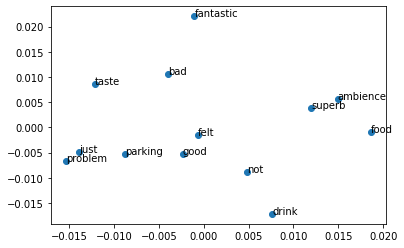

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
vwords = list(model.wv.vocab)
for j, word in enumerate(vwords):
  pyplot.annotate(word,xy=(result[j, 0],result[j, 1]))
pyplot.show()

# other ipynb files

text to speech - 
https://colab.research.google.com/drive/1mR6gv2Yr5IYJpb6T_MdQfFlwJcjkPZ-l?usp=sharing
